# Исследование объявлений о продаже квартир

**Задачи исследования**

На основании данных сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

**Описание данных**

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Данные хранятся в файле real_estate_data.csv

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Обзор данных

Импорт необходимых библиотек

In [127]:
import pandas as pd
import matplotlib.pyplot as plt

Выгрузка данных из файла real_estate_data.csv

In [128]:

data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

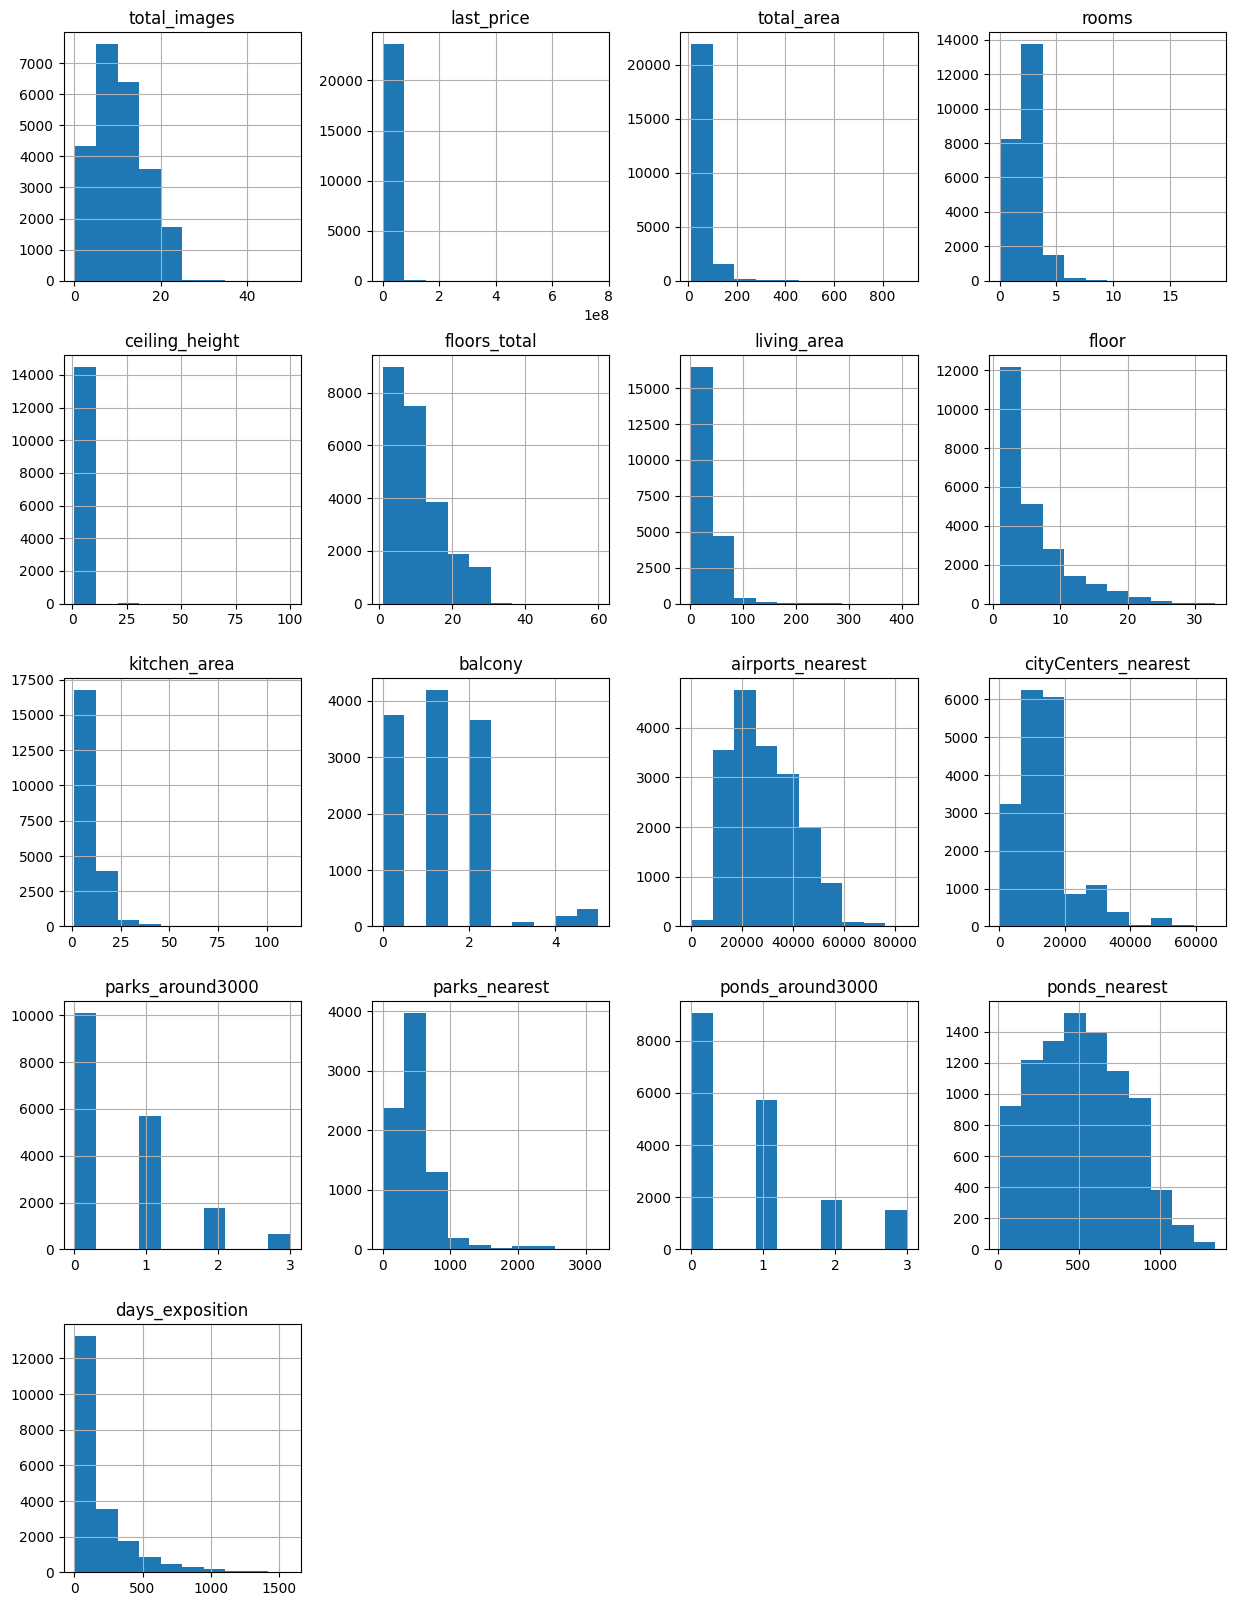

In [129]:
data.info()
data.hist(figsize=(15, 20));

## Предобработка данных

### Обработка пропусков

Вычисление количества пропущенных значений для каждого столбца

In [130]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Количество пропусков в столбцах floors_total составляет 0,36%, locality_name - 0,2%. Такой объем данных не оказывает существенное влияние на общую статистику, соответственно строки с данными пропусками можно исключить.

In [131]:
data.dropna(subset=['locality_name', 'floors_total'], inplace=True)

Пропуск в столбце с балконами скорее всего означает отсутствие балкона и пользователь пропускал данный параметр.Заменим пропуски в столбце с количеством балконов на "0".

In [132]:
data['balcony'] = data['balcony'].fillna(0)

Предположим, что объекты с пропусками в столбце "is_apartment" не являются апартаментами и заменим пропуски на False.

In [133]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Вычислим медианные значения зависимости площади жилого пространства от количества комнат:

In [134]:
full_area = data.pivot_table(index='rooms', values=['living_area','kitchen_area', 'total_area'], aggfunc= 'median')
full_area['kitchen_area_avg'] = full_area['kitchen_area'] / full_area['total_area']
print(full_area)

# Вычислим медианную долю площади в процентах, занимаемую кухней от общей площади в зависимости от количества комнат
kitchen_area = (full_area['kitchen_area'] / full_area['total_area']).median()
kitchen_area


       kitchen_area  living_area  total_area  kitchen_area_avg
rooms                                                         
0               NaN       18.000      26.075               NaN
1              9.00       17.600      36.600          0.245902
2              8.70       30.500      53.000          0.164151
3              9.50       45.000      72.800          0.130495
4             11.00       63.650      99.300          0.110775
5             15.10       91.785     146.000          0.103425
6             19.75      124.400     186.150          0.106097
7             20.00      145.000     214.000          0.093458
8             25.00      161.000     235.700          0.106067
9             14.30      179.200     300.950          0.047516
10            19.80      161.400     272.600          0.072634
11            12.60      133.900     188.900          0.066702
12           112.00      409.700     900.000          0.124444
14            21.25      195.150     304.200          0

0.10474584594998285

В квартирах с количеством комнат "0" площадь кухни не обозначена. Проверим гипотезу, что квартиры без комнат относятся к квартирам типа "Студия"

In [135]:
# Выведем общее количество студий

print('Общее количество студий:', (data['studio'] == True).sum())

# Выведем общее количество квартир c количеством комнат "0"

print('Общее количество квартир с количеством комнат, равных нулю:', (data['rooms'] == 0).sum())

# Построим сводную таблицу, чтобы определить зависимость студий от кол-ва комнат
data.pivot_table(index='rooms', values = 'studio', aggfunc='sum') 

Общее количество студий: 146
Общее количество квартир с количеством комнат, равных нулю: 194


,studio
rooms,
0,135
1,11
2,0
3,0
4,0
5,0
6,0
7,0
8,0


Таким образом, получается, что большинство квартир без комнат приходятся на студии, соответственно в таких квартирах нет отдельных кухонь и их площадь будет равняться нулю. Заполним остутствующие значения в данном столбце на ноль.

In [136]:
# Цикл для замены значений 

for kitchen in data['kitchen_area']:
    
    data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [137]:
# заполняем пропуски в столбце с жилой площадью медианным значением в зависимости от количества комнат
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == room), 'living_area'].median()

In [138]:
# заполняем пропуски в столбце с площадью кухонь медианным значением в зависимости от количества комнат
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms'] == room), 'kitchen_area'].median()

In [139]:
 # Сравним медианное значение до аэропорта со средним
airports_median = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc=(['median','mean']))
airports_median

,median,mean
,airports_nearest,airports_nearest
locality_name,,
Зеленогорск,72282.0,73300.250000
Колпино,26232.0,26375.863501
Красное Село,25723.5,26610.028736
Кронштадт,67850.0,67469.263158
Ломоносов,48415.5,48308.280303
Павловск,20529.5,21053.342105
Петергоф,39231.0,40184.676617
Пушкин,15766.0,16447.869919


Среднее значение не сильно отличается от медианного, следовательно здесь нет аномальных крайних значений. Большинство населенных пунктов небольшого размера и удаленность домов от аэропорта внутри поселков значения не имеют.

In [140]:
# т.к. часть данных с аэропортами имеют нулевые значения и сделать расчет медианы и среднего значения по ним не получится,
# то установим заглушки в виде "0", но будем это учитывать при последующем анализе.

data['airports_nearest'] = data['airports_nearest'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [141]:
# Проверим зависимость между стоимостью квартир и удаленностью от центра
print(data['cityCenters_nearest'].corr(data['last_price']))

# Заменим недостающие значения на медианные и проверим корреляцию еще раз
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())
print(data['cityCenters_nearest'].corr(data['last_price']))

-0.20635314264311072
-0.19060365648883065


Замена пропусков в удаленности от центра на медианные значения не оказала существенного влияния на корреляцию между ценой и удаленностью от центра

In [142]:
# Проверим зависимость между стоимостью квартир и удаленностью от парка
print(data['parks_nearest'].corr(data['last_price']))

# Заменим недостающие значения на медианные и проверим корреляцию еще раз
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
print(data['parks_nearest'].corr(data['last_price']))

-0.016528617232510086
0.000393942920969925


Изначально параметр от парка не оказывал существенного влияния на цену квартиры, заполним пропуски медианными значениями

In [143]:
# Проверим зависимость между стоимостью квартир и удаленностью от водоема
print(data['ponds_nearest'].corr(data['last_price']))

# Заменим недостающие значения на медианные и проверим корреляцию еще раз
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
print(data['ponds_nearest'].corr(data['last_price']))

-0.08583622286926476
-0.07187700475199453


Замена пропусков в удаленности от водоема на медианные значения не оказала существенного влияния на корреляцию между ценой и удаленностью от них

In [144]:
# Проверим зависимость между стоимостью квартир и наличию парков в радиусе 3км
print(data['parks_around3000'].corr(data['last_price']))

# Заменим недостающие значения на медианные и проверим корреляцию еще раз
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
print(data['parks_around3000'].corr(data['last_price']))

# Проверим зависимость между стоимостью квартир и наличию водовемов в радиусе 3км
print(data['ponds_around3000'].corr(data['last_price']))

# Заменим недостающие значения на медианные и проверим корреляцию еще раз
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
print(data['ponds_around3000'].corr(data['last_price']))

0.1514920881210132
0.1982860240961996
0.1607348762732543
0.13562771078869004


Проведем аналогичную замену для водоемов и парков в радиусе 3км, т.к. они не существенно влияют на цену.

Параметр отображения объявления в публикации составляет более 10% и может оказать влияние на общий результат, логически корректно высчитать данный параметр не возможно, поэтому заменим пропуски на ноль и не будем рассматривать эти значения при анализе.

In [145]:
data['days_exposition'] = data['days_exposition'].fillna(0)

Проведем еще раз проверку таблицы на наличие пропусков

In [146]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9084
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

### Обработка дубликатов

Проверим исходные данные на наличие дубликатов. 

In [147]:
# Поиск явных дубликатов
data.duplicated().sum() 

0

In [148]:
# Поиск неявных дубликатов 
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Явные дубликаты отсутствуют. Однако в таблице присутствует множество дубликатов в названиях населенных пунктов из-за разного написания слова "поселок" через "е" и "ё", а также дубли названий поселков в зависимости от обозначения типов. 

In [149]:
# Произведем замену буквы ё на е в словах
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

# Удалим лишние слова в именах поселков

def clean(name):
    splited_name = name.split(' ')
    words_for_remove = {'городского', 'городской', 'типа'}
    good_words = [word for word in splited_name if word not in words_for_remove]
    return ' '.join(good_words)

data['locality_name'] = data['locality_name'].apply(clean)

# Вывод списка значений после замены
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

### Изменение форматов данных

Проведем замену формата столбца на более удобный тип для даты 

In [150]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,45.0,9,False,...,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменим формат столбца "балконы" на целочисленное значение, т.к. там отсутствуют дробные значения

In [151]:
data['balcony'] = data['balcony'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

### Работа с выбросами

Проанализируем выбросы в столбце "Общая площадь"

In [152]:
data.sort_values(by='total_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,...,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,455.0,2.0,318.0,106.0
12859,20,140000000.0,631.2,2019-04-09,7,3.9,4.0,322.3,4,False,...,19.5,1,Санкт-Петербург,25707.0,4972.0,0.0,455.0,2.0,210.0,0.0
3117,19,140000000.0,631.0,2019-03-30,7,NaN,5.0,145.0,5,False,...,60.0,0,Санкт-Петербург,25707.0,4972.0,0.0,455.0,2.0,210.0,0.0
15651,20,300000000.0,618.0,2017-12-18,7,3.4,7.0,258.0,5,False,...,70.0,0,Санкт-Петербург,32440.0,5297.0,0.0,455.0,2.0,198.0,111.0
5358,20,65000000.0,590.0,2019-02-14,15,3.5,6.0,409.0,3,False,...,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,503.0,14.0


In [153]:
# расчет количества квартир с площадью более 200 метров
len(data.query('total_area > 200'))

226

Большинство квартир с площадью более 200 метров приходятся на Санкт-Петербург и составляют менее 1% от общего числа, соответсвенно они не оказывают существенного влияние и ими можно принебречь, удалив их выборки. Также потом их можно сохранить в отдельный массив и проанализировать отдельно.

In [154]:
# Удаление квартир с площадью более 200 метров
data = data.query('total_area <= 200')

Проанализируем выбросы в столбце "Высота потолков"

In [155]:
data.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,8.0,0,Волхов,0.0,13096.5,0.0,455.0,1.0,503.0,0.0
22336,19,9999000.0,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4,Санкт-Петербург,18838.0,3506.0,0.0,455.0,3.0,511.0,0.0
21377,19,4900000.0,42.0,2017-04-18,1,27.5,24.0,37.7,19,False,...,11.0,2,Санкт-Петербург,42742.0,9760.0,0.0,455.0,0.0,503.0,61.0
4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,0.0,2,поселок Мурино,0.0,13096.5,0.0,455.0,1.0,503.0,28.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,12.0,5,Санкт-Петербург,18732.0,20444.0,0.0,455.0,3.0,80.0,38.0
22938,14,4000000.0,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1,деревня Нижняя,0.0,13096.5,0.0,455.0,1.0,503.0,27.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,9.0,2,деревня Мины,0.0,13096.5,0.0,455.0,1.0,503.0,540.0
21824,20,2450000.0,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,...,8.6,2,поселок Большая Ижора,0.0,13096.5,0.0,455.0,1.0,503.0,0.0
17857,1,3900000.0,56.0,2017-12-22,3,27.0,5.0,33.0,4,False,...,9.5,0,Санкт-Петербург,41030.0,15543.0,0.0,455.0,0.0,503.0,73.0


In [156]:
# проверим количество квартир с высотой потолков, которой не может быть
print('Количество квартир с высотой потолков более 4 метров:',len(data.query('ceiling_height > 4')))
print('Количество квартир с высотой потолков менее 2,5 метров:',len(data.query('ceiling_height < 2.5')))

Количество квартир с высотой потолков более 4 метров: 63
Количество квартир с высотой потолков менее 2,5 метров: 73


Заменим данные значения на медианные

In [157]:
# Расчет медианного значения
ceiling_height_median = data['ceiling_height'].median()

# Расчет среднего значения
print(ceiling_height_median)

print(data['ceiling_height'].mean())

# Функция для замены аномального значения на медианное
def ceiling_funct(ceiling_height):
    if ceiling_height < 2.7 or ceiling_height > 4.0:
        return ceiling_height_median
    else:
        return ceiling_height

# Применение функции к таблице
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_funct)

# Проверка функции
data['ceiling_height'].unique()

2.65
2.7645731026785714


array([2.7 ,  nan, 3.03, 2.65, 3.05, 2.75, 2.9 , 2.8 , 3.  , 3.2 , 3.25,
       3.45, 2.77, 2.85, 3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.5 ,
       3.06, 2.72, 2.78, 2.76, 3.7 , 2.87, 3.6 , 2.92, 3.11, 3.13, 3.8 ,
       3.15, 3.55, 3.62, 3.12, 2.74, 2.96, 2.79, 2.95, 2.94, 3.54, 3.53,
       2.83, 3.38, 3.01, 3.65, 3.18, 3.35, 3.57, 2.82, 3.98, 3.83, 3.52,
       3.75, 2.88, 3.67, 3.66, 3.95, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37,
       3.09, 3.16, 3.26, 3.34, 2.81, 3.44, 2.97, 3.9 , 3.22, 3.27, 2.93,
       3.46, 3.47, 3.33, 3.63, 3.14, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04,
       3.84, 3.23, 3.02, 3.21, 3.43, 3.78, 3.39, 3.31, 3.56, 3.85, 3.93,
       3.42, 2.99, 2.91, 3.88, 3.29, 3.51, 2.89, 3.58, 3.48, 3.49, 3.59])

Проанализируем аномальные значение в столбце "Жилая площадь"

In [158]:
data.sort_values(by='living_area').head(20)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6.0,2.0,2,False,...,9.0,0,Санкт-Петербург,32453.0,6521.0,0.0,455.0,1.0,1012.0,91.0
21758,0,2330000.0,23.0,2018-01-01,0,NaN,24.0,2.0,22,False,...,0.0,0,поселок Мурино,0.0,13096.5,0.0,455.0,1.0,503.0,66.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8.0,3.0,8,False,...,16.0,1,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
3242,7,4440000.0,41.0,2017-07-02,1,NaN,17.0,3.0,17,False,...,11.0,0,Санкт-Петербург,19272.0,13073.0,0.0,455.0,0.0,503.0,216.0
17582,11,2680000.0,22.0,2018-08-11,0,NaN,25.0,5.0,8,False,...,0.0,2,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21943,15,6100000.0,77.6,2019-02-28,4,2.65,9.0,5.4,1,False,...,9.8,0,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,503.0,33.0
16431,13,3799000.0,31.0,2018-04-12,1,2.65,5.0,6.0,1,False,...,17.0,0,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,503.0,168.0
19251,19,4050000.0,33.0,2018-10-15,1,2.65,22.0,6.5,21,False,...,18.0,0,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,503.0,44.0
23208,12,4800000.0,37.0,2016-02-24,1,NaN,14.0,8.0,11,False,...,22.0,0,Санкт-Петербург,27838.0,12387.0,2.0,358.0,1.0,950.0,139.0
20994,7,8900000.0,50.6,2018-10-22,2,2.65,7.0,8.0,3,False,...,31.0,0,Санкт-Петербург,12771.0,8301.0,1.0,173.0,3.0,126.0,0.0


In [159]:
# Расчет количества квартир с очень низкой жилой площадью
print(len(data.query('living_area < 10')))

# Удаление значений с выбросами
data = data.query('living_area > 10')

25


Количество выбросов по жилой площади составляет очень маленький процент, поэтому этим строки можно удалить

In [160]:
data.sort_values(by='last_price', ascending=False).head(40)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.00,5,False,...,40.00,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.70,6,False,...,30.20,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,0.0
17912,17,135000000.0,166.0,2019-02-07,3,3.30,7.0,52.00,1,False,...,64.00,0,Санкт-Петербург,32863.0,5955.0,2.0,230.0,3.0,215.0,0.0
4996,20,124000000.0,124.5,2017-10-12,4,3.00,4.0,67.20,2,False,...,20.00,0,Санкт-Петербург,20399.0,1722.0,3.0,302.0,3.0,172.0,45.0
16647,15,122000000.0,145.0,2017-04-25,3,3.30,6.0,36.00,2,False,...,72.00,0,Санкт-Петербург,33931.0,7023.0,2.0,478.0,3.0,250.0,335.0
20264,17,119000000.0,187.6,2017-07-10,4,2.65,7.0,147.00,7,False,...,15.60,0,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
16590,10,98000000.0,155.0,2017-12-16,3,NaN,8.0,45.00,6,False,...,9.50,0,Санкт-Петербург,32440.0,5297.0,0.0,455.0,2.0,198.0,90.0
11329,17,95000000.0,190.0,2019-02-10,5,3.00,7.0,130.00,6,False,...,25.00,0,Санкт-Петербург,21179.0,1032.0,3.0,238.0,3.0,31.0,18.0
12045,1,86738800.0,190.0,2015-09-24,5,3.00,8.0,89.70,8,False,...,25.86,0,Санкт-Петербург,26462.0,6801.0,3.0,139.0,1.0,549.0,0.0
11430,20,85000000.0,145.7,2018-08-16,3,3.36,5.0,87.23,5,False,...,20.31,1,Санкт-Петербург,28371.0,6917.0,2.0,165.0,2.0,500.0,0.0


Количество квартир с ценой более 50000000 менее 30 штук, удалим данные значения из таблицы

In [161]:
data = data.query('last_price < 50000000')

### Добавление в таблицу новых столбцов

Расчет цены одного квадратного метра

In [162]:
data['price_per_metre'] = data['last_price'] / data['total_area']
data.head()

<ipython-input-162-f6d12c47ef0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_per_metre'] = data['last_price'] / data['total_area']


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0,поселок Янино-1,0.0,13096.5,0.0,455.0,1.0,503.0,55.0,95065.789474


Расчет дня публикации объявления (0 - понедельник, 1 - вторник и т.д.)

In [163]:
data['week_day_publication'] = data['first_day_exposition'].dt.weekday
data.head()

<ipython-input-163-ed819b94ce55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['week_day_publication'] = data['first_day_exposition'].dt.weekday


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,week_day_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,поселок Янино-1,0.0,13096.5,0.0,455.0,1.0,503.0,55.0,95065.789474,0


Расчет месяца публикации объявления

In [164]:
data['month_publication'] = data['first_day_exposition'].dt.month
data.head()

<ipython-input-164-0ccd89fb4abf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_publication'] = data['first_day_exposition'].dt.month


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,week_day_publication,month_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,12817.0,18603.0,0.0,455.0,0.0,503.0,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0.0,13096.5,0.0,455.0,1.0,503.0,55.0,95065.789474,0,9


Расчет года публикации объявления

In [165]:
data['year_publication'] = data['first_day_exposition'].dt.year
data.head()

<ipython-input-165-c34773f85c55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_publication'] = data['first_day_exposition'].dt.year


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,week_day_publication,month_publication,year_publication
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,18603.0,0.0,455.0,0.0,503.0,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,13096.5,0.0,455.0,1.0,503.0,55.0,95065.789474,0,9,2018


Расчет типа этажа квартиры (значения — «первый», «последний», «другой»)

In [166]:
# функция для определения категории этажа
def floor_type(floor, total_floors):
    if floor == 1:
        return 'первый'
    if floor == total_floors:
        return 'последний'
    return 'другое'

# применение функции для определения категории этажа
data['floor_type'] = data.apply(lambda x: floor_type(x.floor, x.floors_total), axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,week_day_publication,month_publication,year_publication,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другое
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,455.0,0.0,503.0,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,0.0,455.0,1.0,503.0,55.0,95065.789474,0,9,2018,другое


Расчет расстояния в км до центра города

In [167]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round().astype(int)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,week_day_publication,month_publication,year_publication,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другое,16
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,455.0,0.0,503.0,81.0,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другое,14
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другое,8
5,10,2890000.0,30.4,2018-09-10,1,NaN,12.0,14.4,5,False,...,455.0,1.0,503.0,55.0,95065.789474,0,9,2018,другое,13


В рамках предобработки данных обнаружены проблемы в данных:

* пропущенные значения,
* присутствуют аномальные значения,
* имеются дубликаты — явные и неявные,
* в данных имеются выбросы

Для устранения проблем было выполнено следующее:

* произведена оработка пропусков, где это возможно,
* удалены явные и обработаны неявные дубликаты,
* изменены типы данных некоторых столбцах
* обработаны аномальные значения
* добавлены новые столбцы 

## Исследовательский анализ данных

### Общая площадь

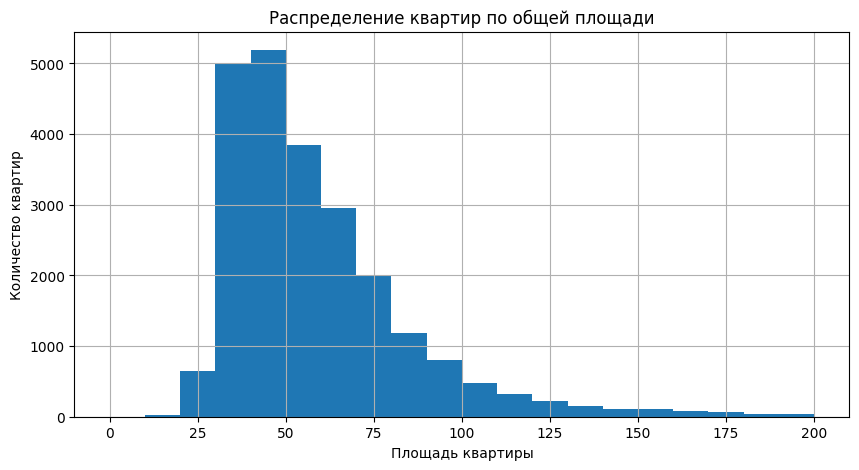

In [168]:
# Построим Гистограмму для общей площади
data['total_area'].hist(bins=20, range=(0,200), figsize=(10, 5))
plt.title('Распределение квартир по общей площади')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь квартиры')
plt.show;

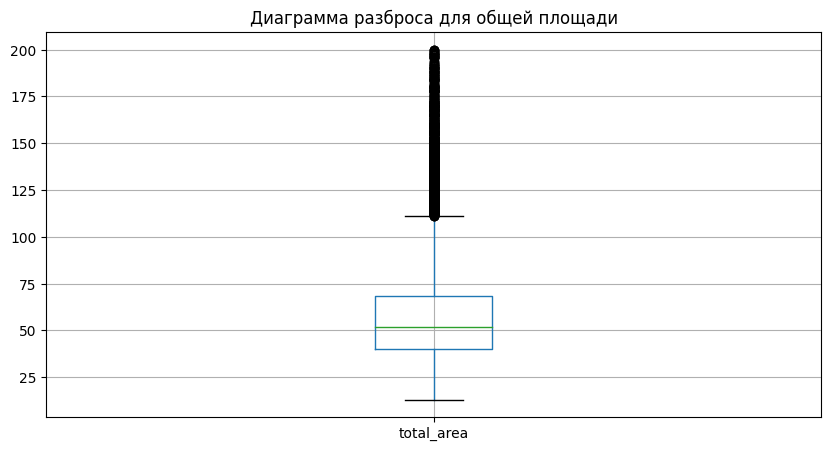

In [217]:
# Построение диаграммы разброса
data.boxplot('total_area', figsize=(10, 5))
plt.title('Диаграмма разброса для общей площади')
plt.show;

На основании полученных данных можно сделать выводы, что большинство сделок проводится с площадью от 30 до 50 метров. 

### Жилая площадь

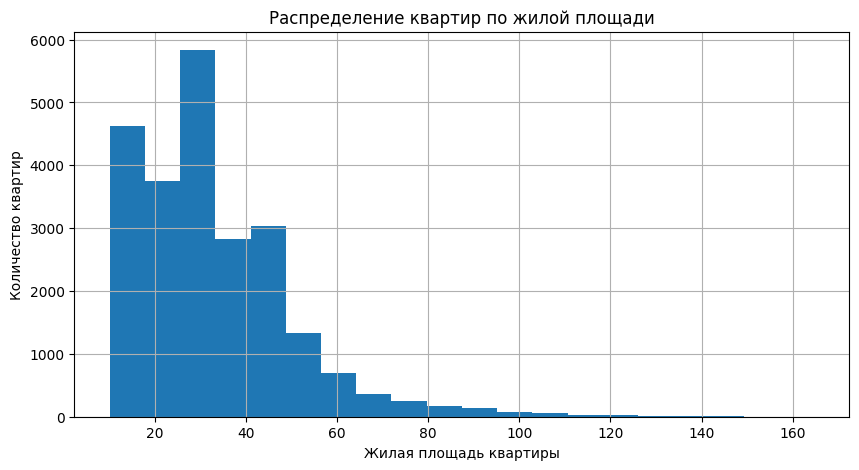

In [170]:
# Построим Гистограмму для жилой площади
data['living_area'].hist(bins=20, figsize=(10, 5))
plt.title('Распределение квартир по жилой площади')
plt.ylabel('Количество квартир')
plt.xlabel('Жилая площадь квартиры')
plt.show;

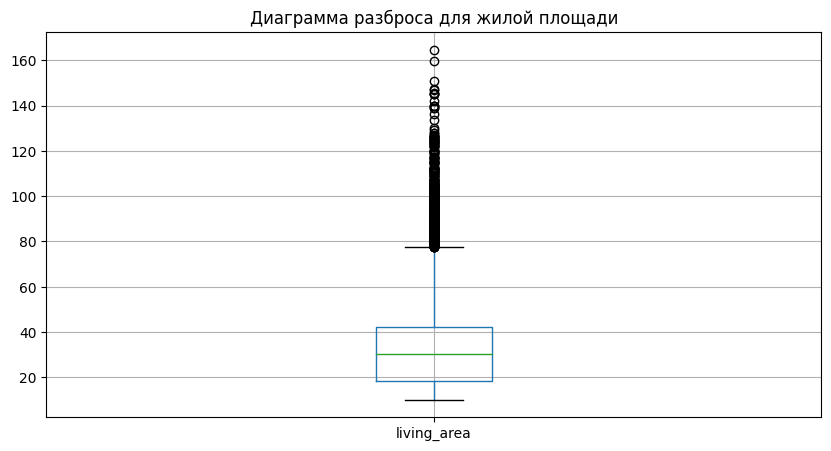

In [218]:
# Построение диаграммы разброса
data.boxplot('living_area', figsize=(10, 5))
plt.title('Диаграмма разброса для жилой площади')
plt.show;

Жилая площадь в большинстве квартир, с которыми были совершены сделки составляет от 10 до 30 кв.м.

### Площадь кухни

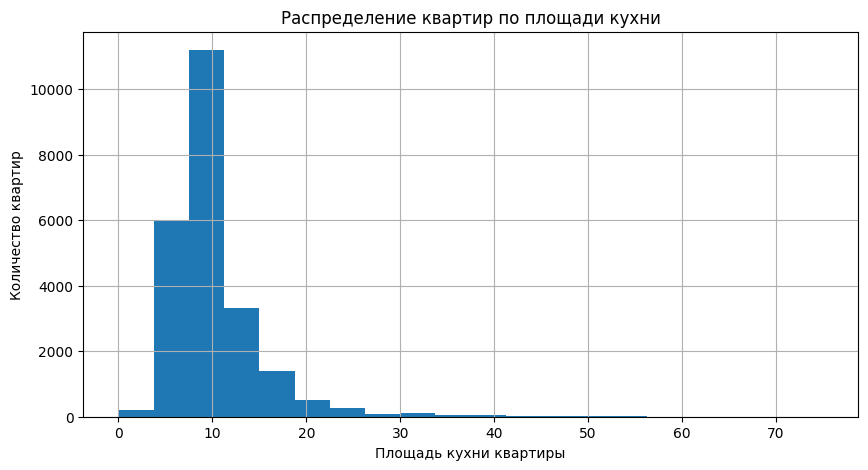

In [172]:
# Построим Гистограмму для кухонь
data['kitchen_area'].hist(bins=20, figsize=(10, 5))
plt.title('Распределение квартир по площади кухни')
plt.ylabel('Количество квартир')
plt.xlabel('Площадь кухни квартиры')
plt.show;

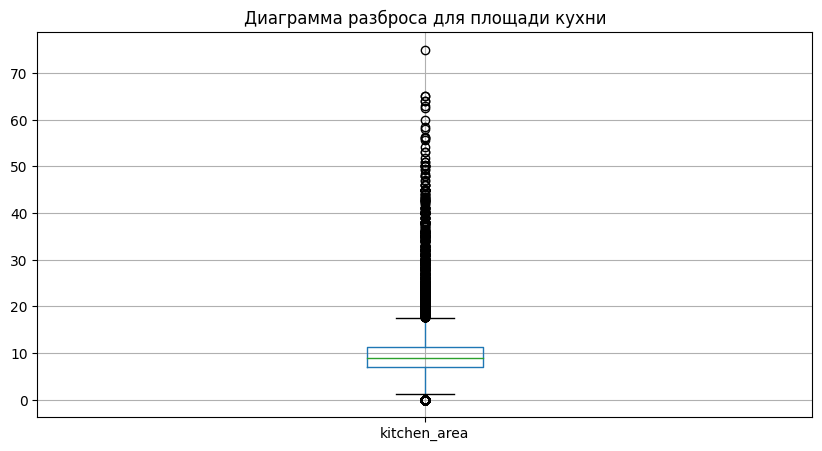

In [220]:
# Построение диаграммы разброса
data.boxplot('kitchen_area', figsize=(10, 5))
plt.title('Диаграмма разброса для площади кухни')
plt.show;

Можно сделать вывод, что самые типовые размеры кухни от 5 до 15 метров

### Цена объекта

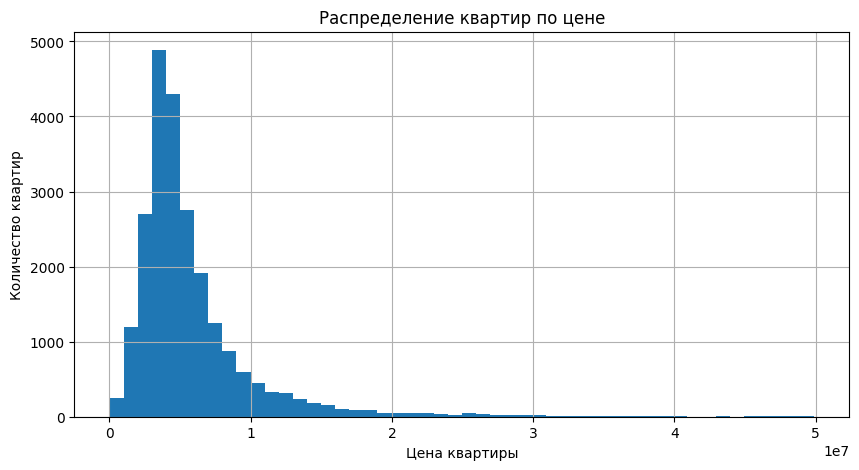

In [174]:
# Построим Гистограмму для цен
data['last_price'].hist(bins=50, figsize=(10, 5))
plt.title('Распределение квартир по цене')
plt.ylabel('Количество квартир')
plt.xlabel('Цена квартиры')
plt.show;

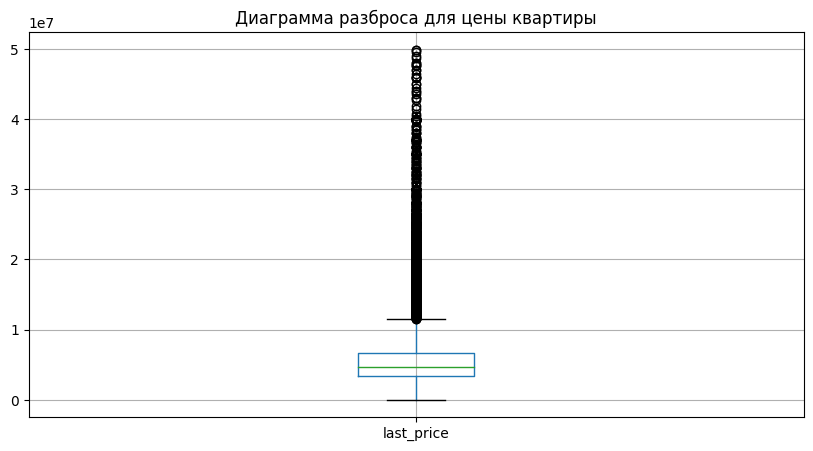

In [221]:
# Построение диаграммы разброса
data.boxplot('last_price', figsize=(10, 5))
plt.title('Диаграмма разброса для цены квартиры')
plt.show;

Наибольшее количество сделок происходит в диапазоне от 4 до 6 млн. рублей 

### Количество комнат

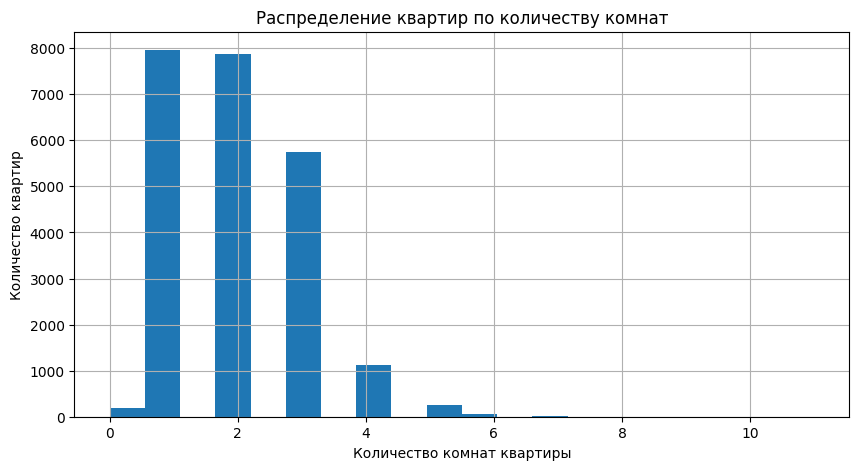

In [176]:
# Построим Гистограмму для комнат
data['rooms'].hist(bins=20, figsize=(10, 5))
plt.title('Распределение квартир по количеству комнат')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат квартиры')
plt.show;

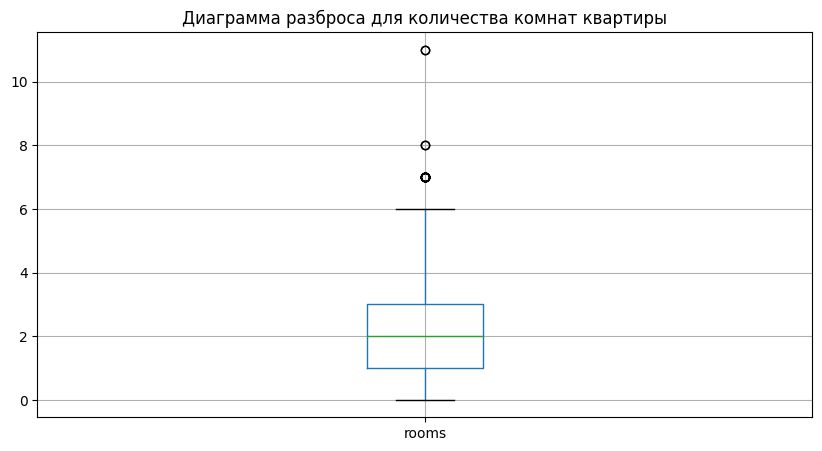

In [222]:
# Построение диаграммы разброса
data.boxplot('rooms', figsize=(10, 5))
plt.title('Диаграмма разброса для количества комнат квартиры')
plt.show;

Наибольшее количество сделок происходит с квартирам с 1 и 2 комнатами

### Высота потолков

Т.к. высота потолков в квартире не зависит этажа, площади и прочих параметров, а количество пропусков достаточно велико и при неправильном заполнении может повлиять на результаты исследования, то мы проведем сравнение результатов без данных строк и при условии заполнения столбца медианными значениями.

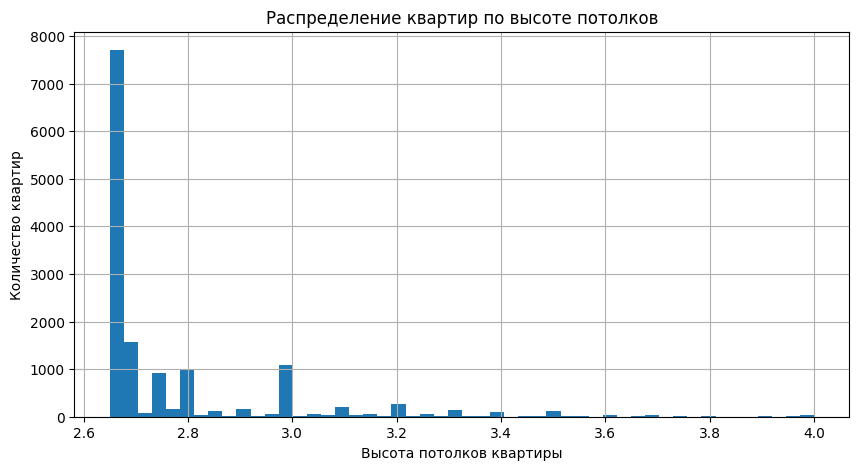

In [178]:
# Построим Гистограмму для высоты потолков без учета столбцов с пропусками
data['ceiling_height'].hist(bins=50, figsize=(10, 5))
plt.title('Распределение квартир по высоте потолков')
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолков квартиры')
plt.show;

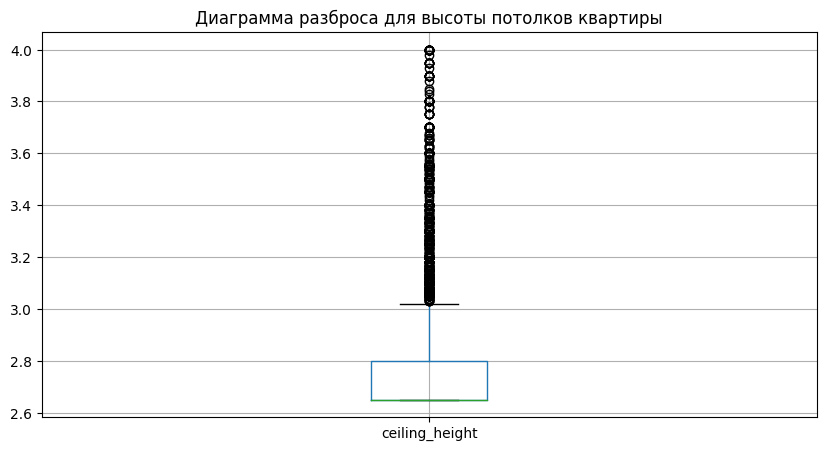

In [223]:
# Построение диаграммы разброса
data.boxplot('ceiling_height', figsize=(10, 5))
plt.title('Диаграмма разброса для высоты потолков квартиры')
plt.show;

In [180]:
print('Медианное значение высоты потолков:', data['ceiling_height'].median())
print('Среднее значение высоты потолков:', data['ceiling_height'].mean())

Медианное значение высоты потолков: 2.65
Среднее значение высоты потолков: 2.7687012895991026


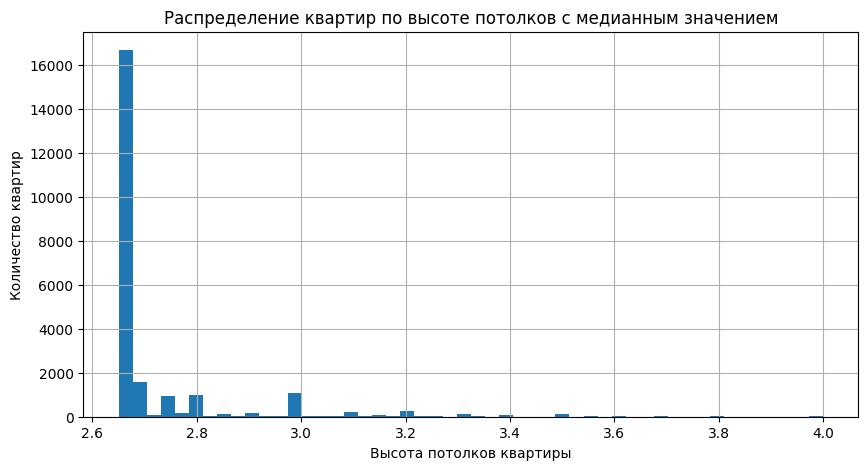

In [181]:
# Создадим таблицу со значениями столбца высоты потолков
data1 = data['ceiling_height']
# Заполним пропуски мединным значением
data1 = data1.fillna(data1.median())
# Построим гистограмму
data1.hist(bins=50, figsize=(10, 5))
plt.title('Распределение квартир по высоте потолков с медианным значением')
plt.ylabel('Количество квартир')
plt.xlabel('Высота потолков квартиры')
plt.show;

In [182]:
# Проверим, повлияло ли это на корреляцию высоты потолков от цены

# Проверка корреляции до замены

print('Корреляция до замены:', data['ceiling_height'].corr(data['last_price']))
      
# добавим в таблицу столбец с высотой потолков после замены
data['ceiling_height_full'] = data1

# Проверка корреляции после замены
print('Корреляция после замены:', data['ceiling_height_full'].corr(data['last_price']))

Корреляция до замены: 0.47689866338679554
Корреляция после замены: 0.3901012423637922


Т.к. медианное значение высоты потолков было 2.5, то логично предположить, что большинство сделок проиcходит среди квартир от 2,5 до 3 метров

### Этаж квартиры

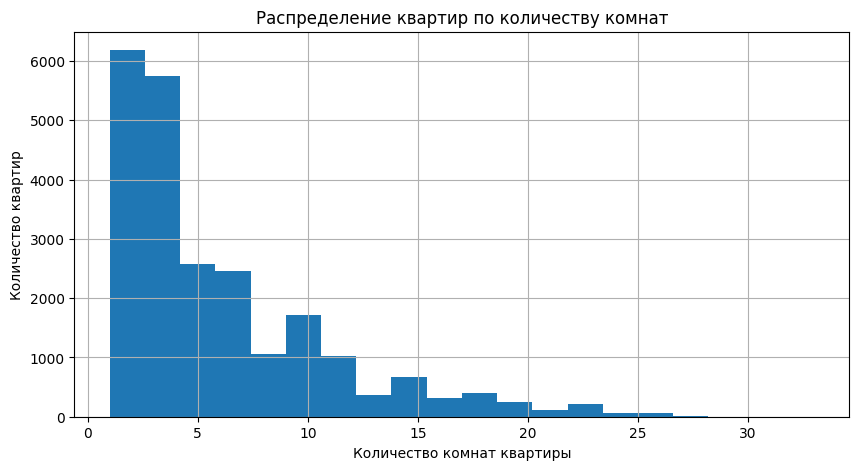

In [183]:
# Построим Гистограмму для комнат
data['floor'].hist(bins=20, figsize=(10, 5))
plt.title('Распределение квартир по количеству комнат')
plt.ylabel('Количество квартир')
plt.xlabel('Количество комнат квартиры')
plt.show;

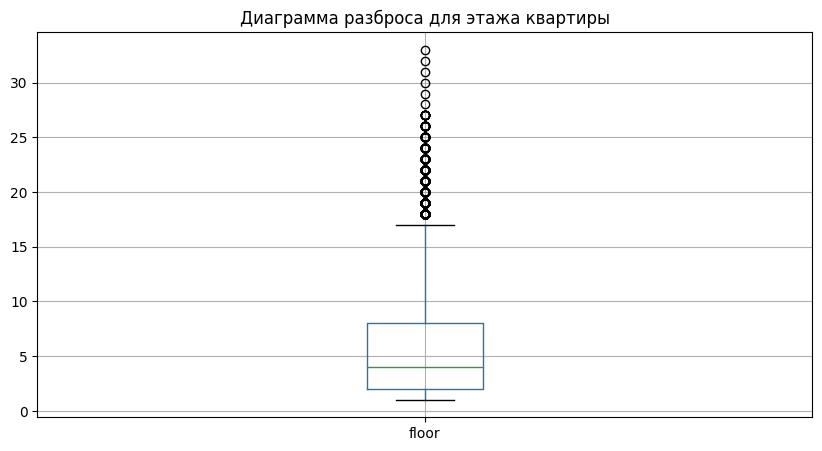

In [224]:
# Построение диаграммы разброса
data.boxplot('floor', figsize=(10, 5))
plt.title('Диаграмма разброса для этажа квартиры')
plt.show;

Большинство квартир продается на 1 и 2 этаже

Тип этажа квартиры («первый», «последний», «другой»)

In [185]:
# Построим Гистограмму для комнат
data['floor_type'].value_counts()

другое       17098
последний     3244
первый        2886
Name: floor_type, dtype: int64

По данному показателю можно сделать вывод, что последний этаж также популярен, о чем нельзя сделать вывод по предыдущему разделу, т.к. оттуда не понятно, является ли этаж в гистограмме последним.

Общее количество этажей в доме;

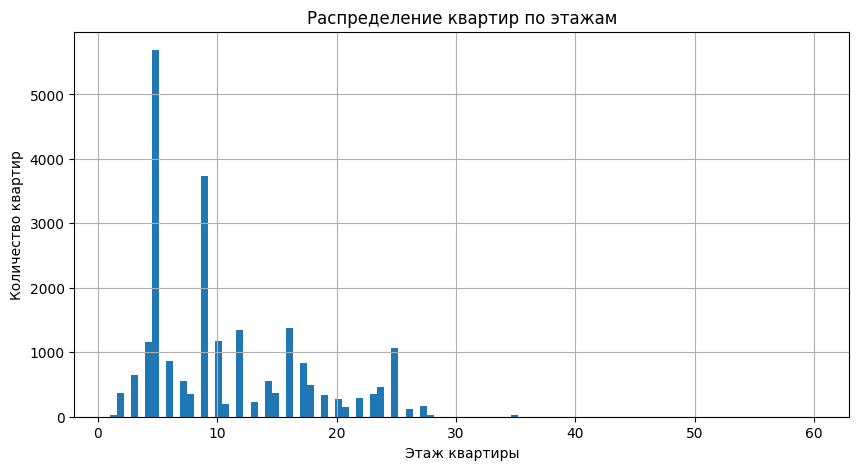

In [186]:
# Построим Гистограмму для этажей
data['floors_total'].hist(bins=100, figsize=(10, 5))
plt.title('Распределение квартир по этажам')
plt.ylabel('Количество квартир')
plt.xlabel('Этаж квартиры')
plt.show;

Наиболее популярны сделки в 5 и 9-этажных домах

### Расстояние до центра города в метрах

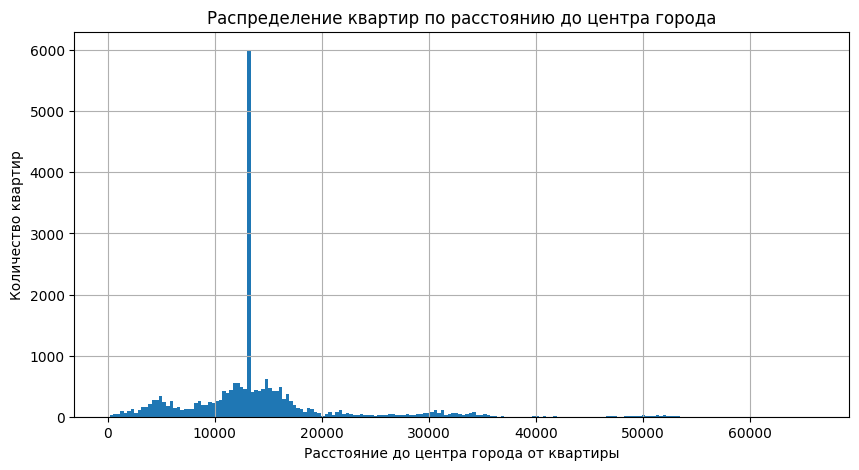

In [187]:
# Построим Гистограмму для расстояния
data['cityCenters_nearest'].hist(bins=200, figsize=(10, 5))
plt.title('Распределение квартир по расстоянию до центра города')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до центра города от квартиры')
plt.show;


Наибольшее количество сделок происходит в квартирах на расстоянии в районе 11-12 км от центра

### Расстояние до ближайшего аэропорта

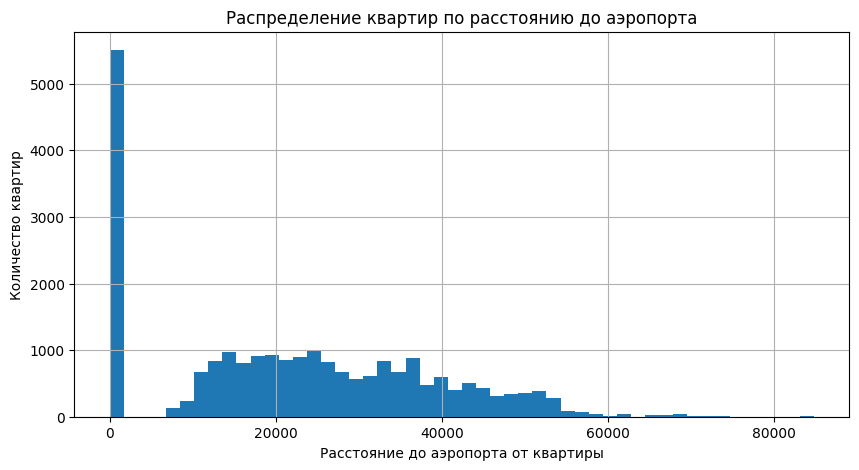

In [188]:
# Построим Гистограмму для аэропортов
data['airports_nearest'].hist(bins=50, figsize=(10, 5))
plt.title('Распределение квартир по расстоянию до аэропорта')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до аэропорта от квартиры')
plt.show;

Значение 0 в данном анализе не учитывается, т.к. это установленная заглушка. В плане аэропортов отсутствует какой-то ярко выраженный сегмент.

### Расстояние до ближайшего парка

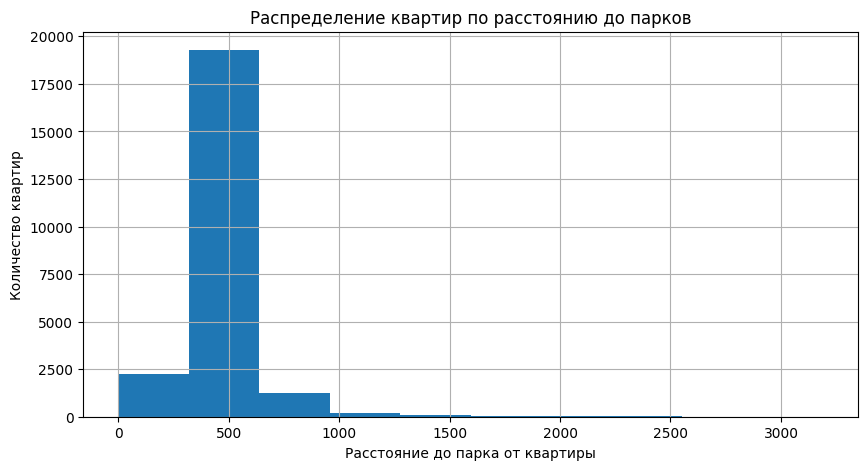

In [189]:
# Построим Гистограмму для расстояния до парка
data['parks_nearest'].hist(figsize=(10, 5))
plt.title('Распределение квартир по расстоянию до парков')
plt.ylabel('Количество квартир')
plt.xlabel('Расстояние до парка от квартиры')
plt.show;

Наиболее популярны квартиры с рассточнием от 300 до 600 метров до парка.

### День и месяц публикации объявления

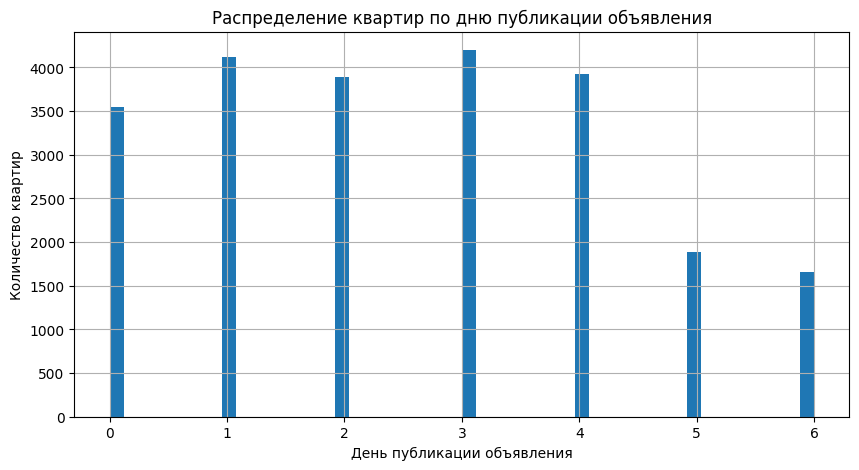

In [190]:
# Построим Гистограмму для дня публикации
data['week_day_publication'].hist(bins=50, figsize=(10, 5))
plt.title('Распределение квартир по дню публикации объявления')
plt.ylabel('Количество квартир')
plt.xlabel('День публикации объявления')
plt.show;

Больше всего публикаций по вторникам и четвергам, меньше всего в субботу и воскресенье

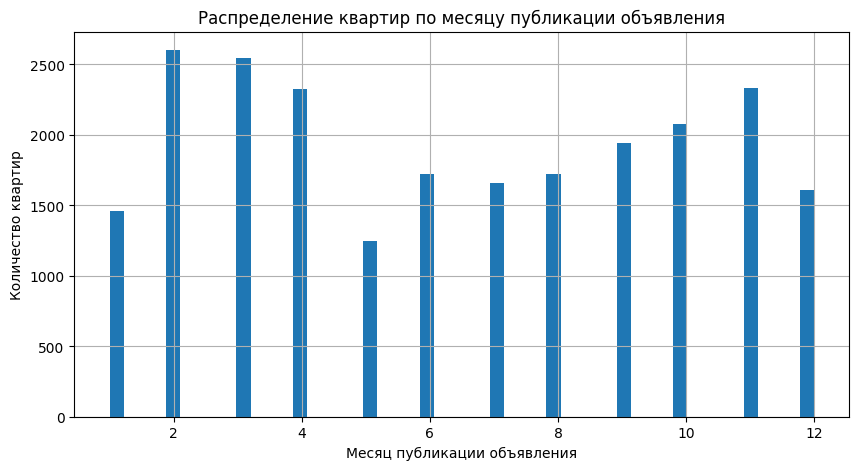

In [197]:
# Построим Гистограмму для месяца публикации
data['month_publication'].hist(bins=50, figsize=(10, 5))
plt.title('Распределение квартир по месяцу публикации объявления')
plt.ylabel('Количество квартир')
plt.xlabel('Месяц публикации объявления')
plt.show;

Больше всего публикаций в феврале, марте, апреле и ноябре, меньше всего в мае, январе и декабре. Также летом идет спад публикаций. 

### Скорость продажи квартир

Медианное значение: 73.0
Среднее значение: 155.41794386085758


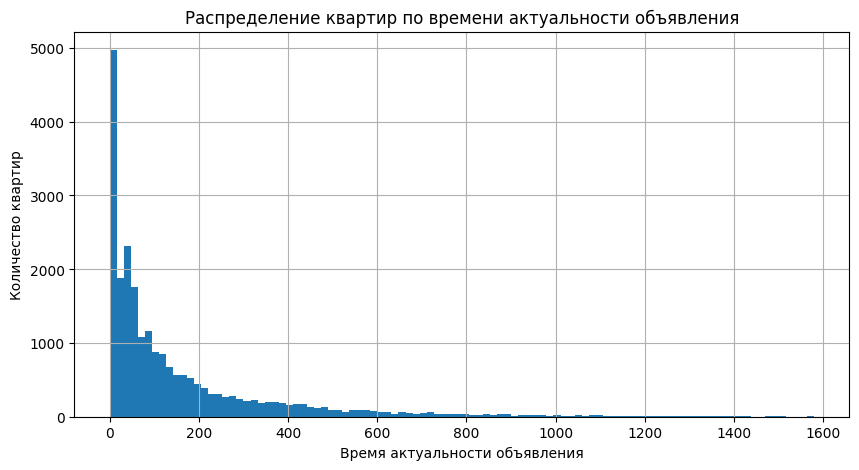

In [198]:
# Строим гистограмму
data['days_exposition'].hist(bins=100, figsize=(10, 5))
plt.title('Распределение квартир по времени актуальности объявления')
plt.ylabel('Количество квартир')
plt.xlabel('Время актуальности объявления')
plt.show;

# Вычисляем медианное и среднее значение:
print('Медианное значение:', data['days_exposition'].median())
print('Среднее значение:', data['days_exposition'].mean())

В среднем продажа квартиры занимает 2-3 месяца. Однако большинство квартир было продано в течение одного месяца. Быстрые продажи - менее месяца, медленные. Необычно долгие - больше года.

### Определение факторов больше всего влияющих на общую (полную) стоимость объекта.

<ipython-input-193-ba17c4869245>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  factors_table.corr()


,last_price,total_area,living_area,kitchen_area,rooms,week_day_publication,month_publication,year_publication
last_price,1.000000,0.767322,0.631500,0.567582,0.470806,-0.017692,0.002815,-0.039436
total_area,0.767322,1.000000,0.909369,0.553170,0.790251,-0.016255,0.007350,-0.079442
living_area,0.631500,0.909369,1.000000,0.325763,0.881404,-0.012286,-0.002564,-0.067978
kitchen_area,0.567582,0.553170,0.325763,1.000000,0.226337,-0.015781,0.003475,-0.051258
rooms,0.470806,0.790251,0.881404,0.226337,1.000000,-0.005731,-0.004248,-0.046433
week_day_publication,-0.017692,-0.016255,-0.012286,-0.015781,-0.005731,1.000000,0.012432,-0.002719
month_publication,0.002815,0.007350,-0.002564,0.003475,-0.004248,0.012432,1.000000,-0.273266
year_publication,-0.039436,-0.079442,-0.067978,-0.051258,-0.046433,-0.002719,-0.273266,1.000000


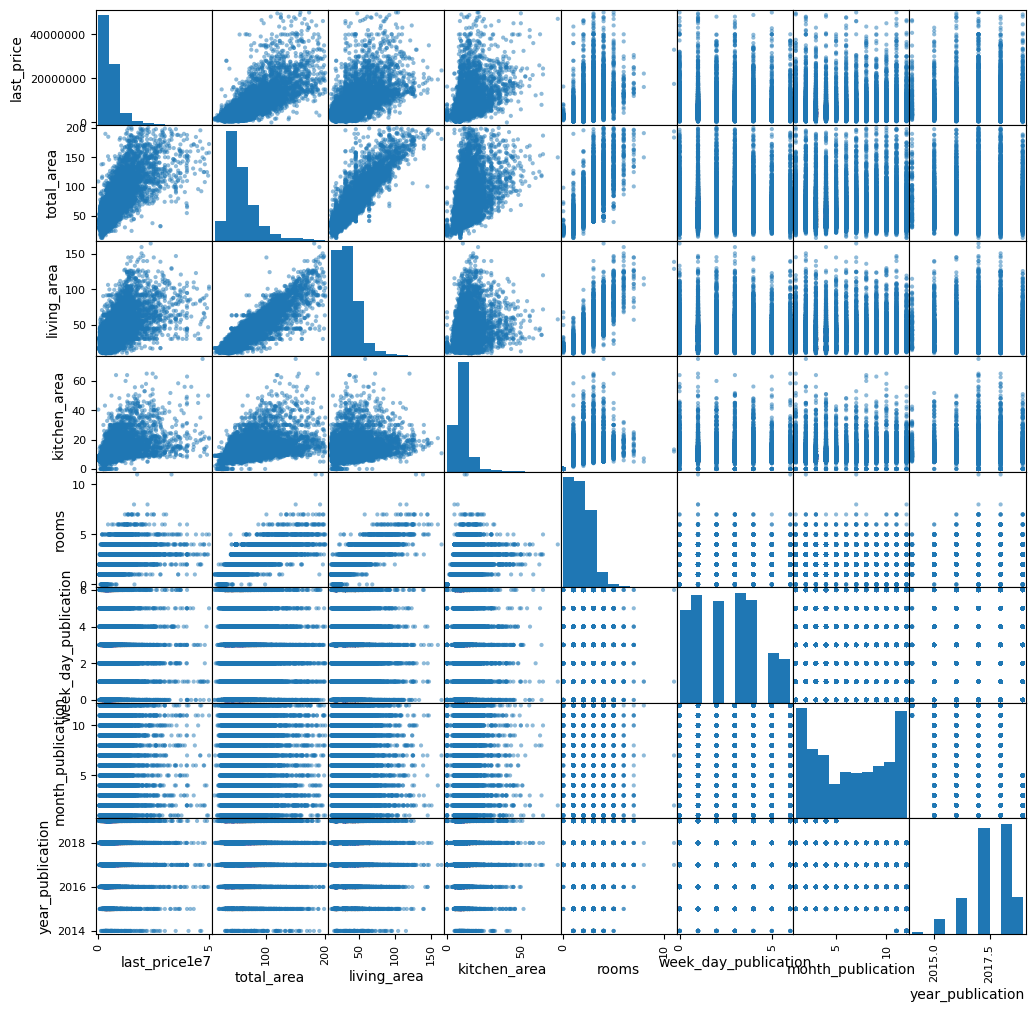

In [193]:
# Создание таблицы со столбцами, по которым надо провести анализ
factors_table = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'week_day_publication', 'month_publication', 'year_publication']].copy()

# Построение графиков
pd.plotting.scatter_matrix(factors_table, figsize=(12, 12))

# Построение сводной таблицы кореляции
factors_table.corr()

Из указанных факторов больше всего влияет на полную стоимость квартиры общая площадь, жилая площадь и площадь кухни

### Изучение влияния площади

            last_price  total_area
last_price    1.000000    0.822327
total_area    0.822327    1.000000


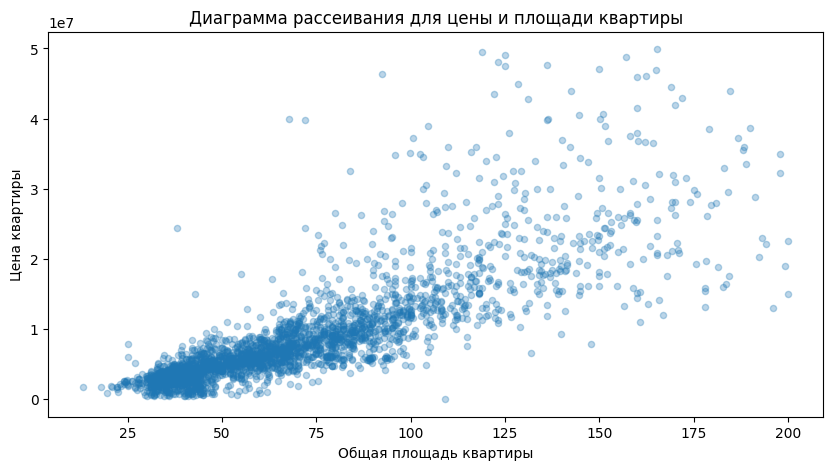

In [200]:
# Построение сводной таблицы по цене и площади
data_total_area = data.pivot_table(index='last_price', values = ['total_area'], aggfunc='median').reset_index()

# Расчет коэффициента корреляции
print(data_total_area.corr())

# Построение диаграммы рассеивания
data_total_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены и площади квартиры')
plt.ylabel('Цена квартиры')
plt.xlabel('Общая площадь квартиры')
plt.show;


Цена на квартиры сильно зависит от ее площади. Чем больше площадь - тем выше цена. Коэффициент корреляции - 0,82

### Изучение влияния жилой площади

             last_price  living_area
last_price     1.000000     0.708197
living_area    0.708197     1.000000


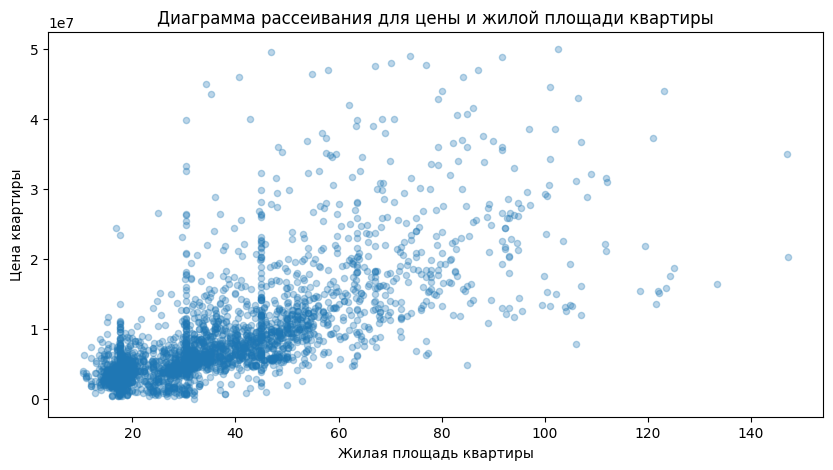

In [204]:
# Построение сводной таблицы по цене и жилой площади
data_living_area = data.pivot_table(index='last_price', values = ['living_area'], aggfunc='median').reset_index()

# Расчет коэффициента корреляции
print(data_living_area.corr())

# Построение диаграммы рассеивания
data_living_area.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены и жилой площади квартиры')
plt.ylabel('Цена квартиры')
plt.xlabel('Жилая площадь квартиры')
plt.show;

Цена на квартиры зависит от ее жилой площади, но в меньшей степени, чем от общей площади. Чем больше площадь - тем выше цена. Коэффициент корреляции - 0,70

### Изучение влияния площади кухни

              last_price  kitchen_area
last_price      1.000000      0.592736
kitchen_area    0.592736      1.000000


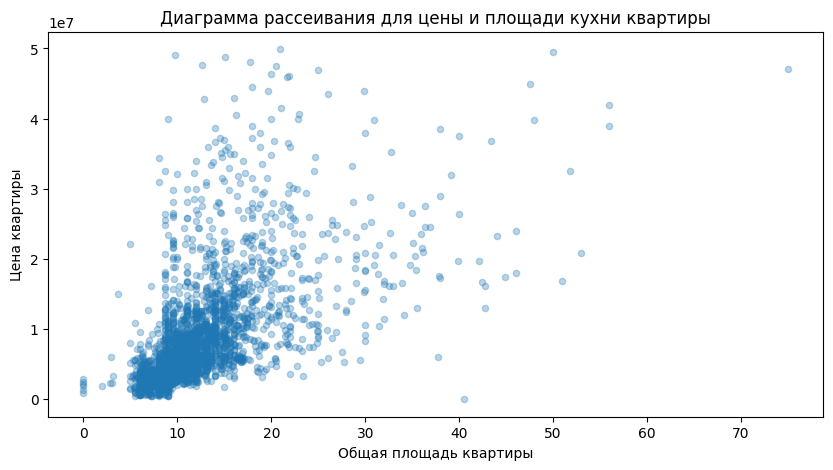

In [205]:
# Построение сводной таблицы по цене и площади кухни
data_kitchen_area = data.pivot_table(index='last_price', values = ['kitchen_area'], aggfunc='median').reset_index()

# Расчет коэффициента корреляции
print(data_kitchen_area.corr())

# Построение диаграммы рассеивания
data_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены и площади кухни квартиры')
plt.ylabel('Цена квартиры')
plt.xlabel('Общая площадь квартиры')
plt.show;

Площадь кухни оказывает меньшее влияние, чем жилая площадь. Коэффициент корреляции: 0,59

### Изучение влияния типа этажа

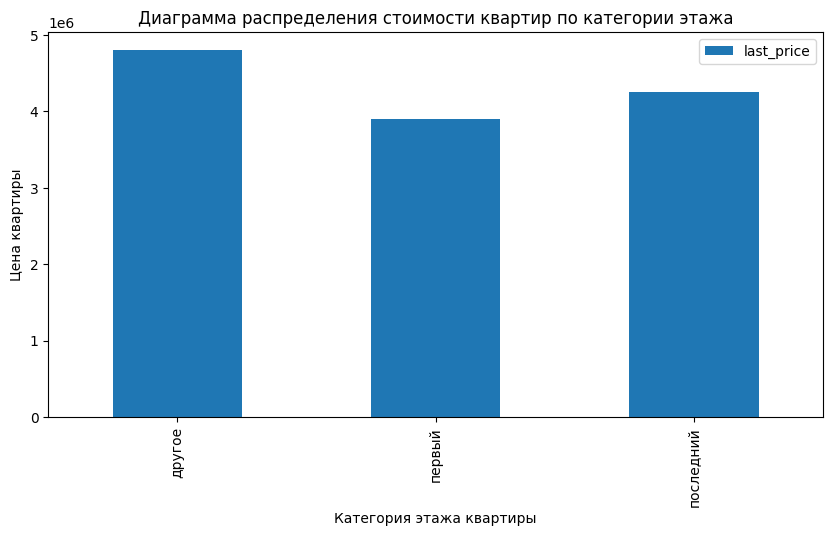

In [210]:
# Построение сводной таблицы по цене и категории этажа
data_floor = data.pivot_table(index='floor_type', values = ['last_price'], aggfunc='median').reset_index()


# Построение диаграммы 
data_floor.plot(x='floor_type', y='last_price', kind='bar', figsize=(10, 5))
plt.title('Диаграмма распределения стоимости квартир по категории этажа')
plt.ylabel('Цена квартиры')
plt.xlabel('Категория этажа квартиры')
plt.show;

В данном случае нет прямой линейной зависимости. Однако можно сделать вывод, что самые дешевые квартиры на первом этаже, самые дорогие посередине. Последний этаж не является самым дорогим. Разрыв в стоимости квартир по категориям этажа не очень большой.

### Изучение влияния дня публикации

                      week_day_publication  last_price
week_day_publication              1.000000   -0.819021
last_price                       -0.819021    1.000000


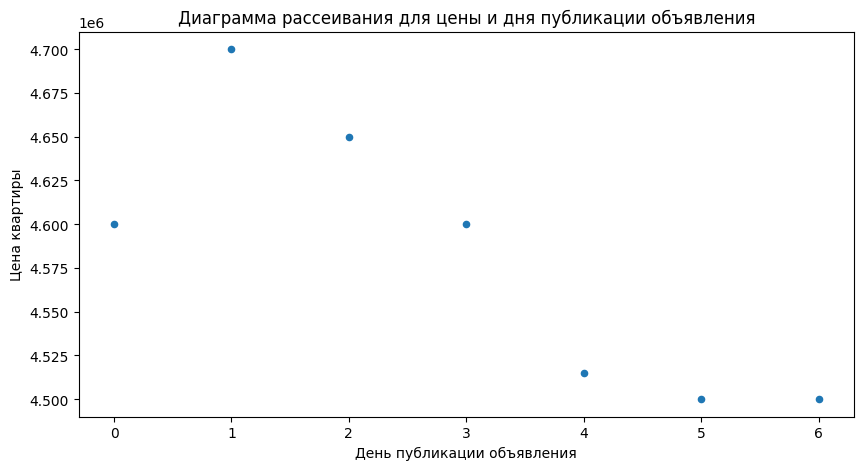

In [212]:
# Построение сводной таблицы по цене и дню публикациим
data_week_day = data.pivot_table(index='week_day_publication', values = 'last_price', aggfunc='median').reset_index()

# Расчет коэффициента корреляции
print(data_week_day.corr())

# Построение диаграммы рассеивания
data_week_day.plot(x='week_day_publication', y='last_price', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены и дня публикации объявления')
plt.ylabel('Цена квартиры')
plt.xlabel('День публикации объявления')
plt.show;

Можно сделать вывод, что во вторник публикуются объекты с самой высокой ценой, в воскресенье с низкой. Получается зависимость, что со вторника медианная стоимость публикуемых объектов снижается. С понедельника начинает расти. Коэффициент корреляции: 0.82, следовательно день публикации оказывает существенное влияние на стоимость публикуемых объектов.

### Изучение влияния месяца публикации

                   month_publication  last_price
month_publication           1.000000    0.033399
last_price                  0.033399    1.000000


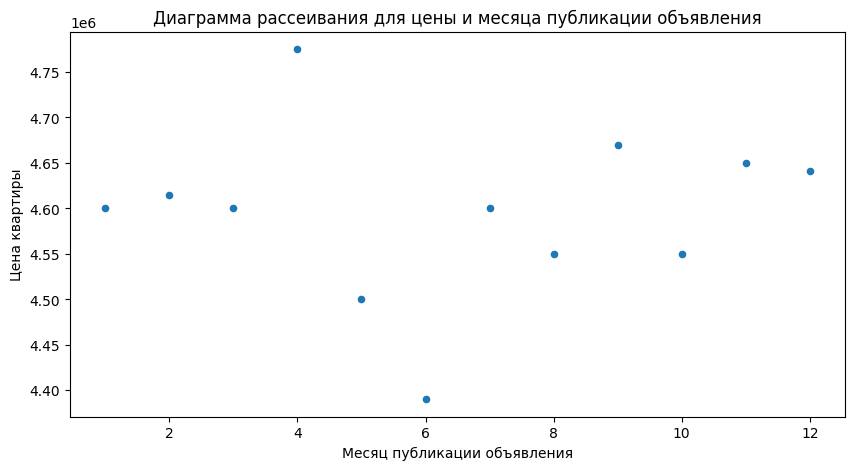

In [213]:
# Построение сводной таблицы по цене и месяцу публикации
data_month = data.pivot_table(index='month_publication', values = 'last_price', aggfunc='median').reset_index()

# Расчет коэффициента корреляции
print(data_month.corr())

# Построение диаграммы рассеивания
data_month.plot(x='month_publication', y='last_price', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены и месяца публикации объявления')
plt.ylabel('Цена квартиры')
plt.xlabel('Месяц публикации объявления')
plt.show;

Прямой зависимости между месяцем и ценой нет. Коэффициент корреляции 0.03. Можно выделить, что самые дешевые объекты публикуюися в июне, самые дорогие в апреле.

### Изучение влияния года публикации

                  year_publication  last_price
year_publication          1.000000   -0.665647
last_price               -0.665647    1.000000


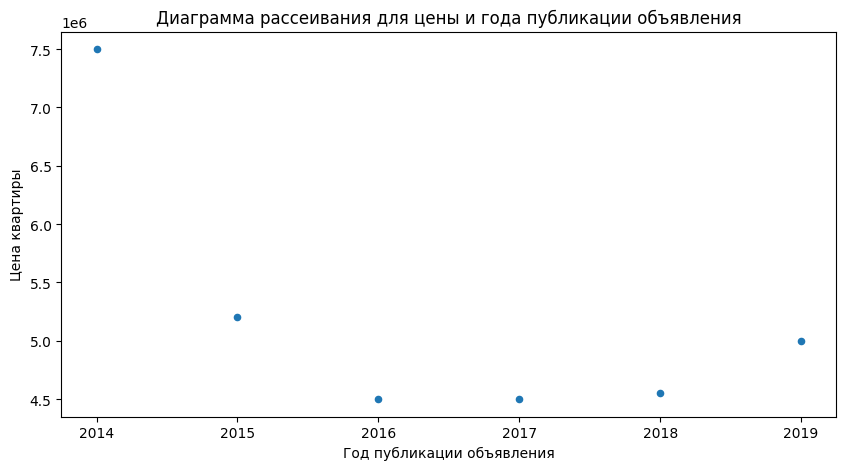

In [214]:
# Построение сводной таблицы по цене и году публикации
data_year = data.pivot_table(index='year_publication', values = 'last_price', aggfunc='median').reset_index()

# Расчет коэффициента корреляции
print(data_year.corr())

# Построение диаграммы рассеивания
data_year.plot(x='year_publication', y='last_price', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены и года публикации объявления')
plt.ylabel('Цена квартиры')
plt.xlabel('Год публикации объявления')
plt.show;

Самые дорогие объекты продавались в 2014 году, потом пошел резкий спад. В 2019 опять наблюдается тенденция к росту стоимости объектов. Имеется прямая линейная зависимость между годом и стоимостью, коэффициент корреляции 0.66.

### Изучение влияния количества комнат

             rooms  last_price
rooms       1.0000      0.9923
last_price  0.9923      1.0000


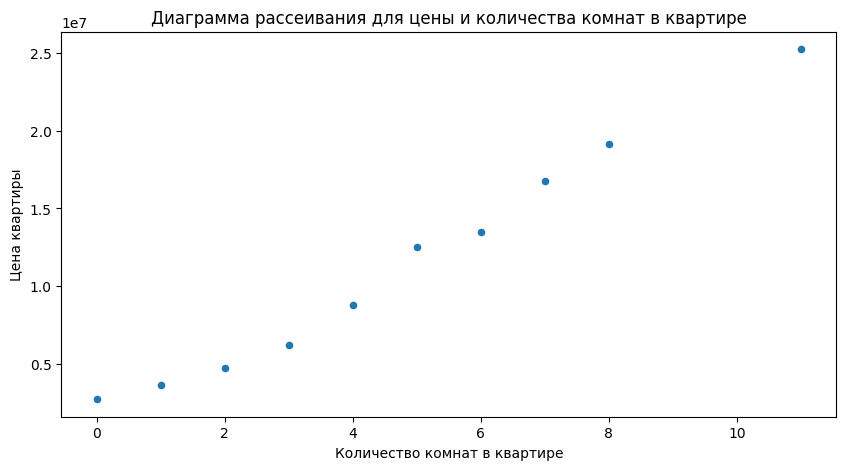

In [215]:
# Построение сводной таблицы по цене и количеству комнат
data_rooms = data.pivot_table(index='rooms', values = 'last_price', aggfunc='median').reset_index()

# Расчет коэффициента корреляции
print(data_rooms.corr())

# Построение диаграммы рассеивания
data_rooms.plot(x='rooms', y='last_price', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены и количества комнат в квартире')
plt.ylabel('Цена квартиры')
plt.xlabel('Количество комнат в квартире')
plt.show;

Имеется сильная линейная зависимость между количеством комнат и ценой. Коэффициент корреляции 0.99. Чем больше комнат - тем больше цена.

**Вывод:** Таким образом, можно сделать вывод, что больше всего на цену объекта имеют влияние следующие параметры: количество комнат, жилая площадь и день публикации. Месяц и тип этажа практически не оказывают никакого влияния. </div> 

### Расчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [90]:
# Расчет общего количества объявлений по городам
locality_ad = data['locality_name'].value_counts()

# создание сводной таблицы по ценам и площади для разных городов
locality_avg_price = data.pivot_table(index='locality_name', values=['last_price', 'total_area'])

# расчет средней стоимости за квадратный метр
locality_avg_price['price_per_m_avg'] = locality_avg_price['last_price'] / locality_avg_price['total_area']

# объединение таблиц
locality_avg_price = locality_avg_price.join(locality_ad)

# переименуем столбец с количеством объявлений
locality_avg_price.rename(columns={'locality_name': 'total_ad'}, inplace=True)

# сортировка по возрастанию по количеству объявлений
locality_avg_price.sort_values(by='total_ad', ascending=False).head(10).reset_index()

,locality_name,last_price,total_area,price_per_m_avg,total_ad
0,Санкт-Петербург,8.064895e+06,64.746341,124561.405666,15651
1,посёлок Мурино,3.671211e+06,44.150077,83152.990412,520
2,посёлок Шушары,4.109809e+06,53.886925,76267.270155,439
3,Всеволожск,3.789068e+06,56.022186,67635.128626,398
4,Пушкин,6.469036e+06,61.552791,105097.361245,369
5,Колпино,3.964021e+06,53.231479,74467.617484,338
6,посёлок Парголово,4.488075e+06,51.521407,87110.874551,327
7,Гатчина,3.488337e+06,50.942932,68475.381534,307
8,деревня Кудрово,4.234158e+06,46.571739,90916.895213,299
9,Выборг,3.250983e+06,56.150042,57898.142109,237


Среди выборки из 10 населенных пунктов c самым большим количеством объявлений самая большая цена за метр в Санкт-Петербурге, самая малая в Выборге

Проанализируем как стоимость объектов зависит от расстояния до центра города.

29
                          last_price  price_per_km  Centers_nearest_km
cityCenters_nearest_km                                                
1                       1.256748e+07  1.256748e+07                 1.0
2                       1.181925e+07  5.909625e+06                 2.0
3                       1.010803e+07  3.369343e+06                 3.0
4                       1.072291e+07  2.680728e+06                 4.0
5                       1.119263e+07  2.238527e+06                 5.0
6                       1.112110e+07  1.853517e+06                 6.0
7                       1.112091e+07  1.588701e+06                 7.0
8                       8.928111e+06  1.116014e+06                 8.0
9                       6.924619e+06  7.694021e+05                 9.0
10                      6.369510e+06  6.369510e+05                10.0
11                      6.102179e+06  5.547435e+05                11.0
12                      5.786081e+06  4.821734e+05                12.0
13 

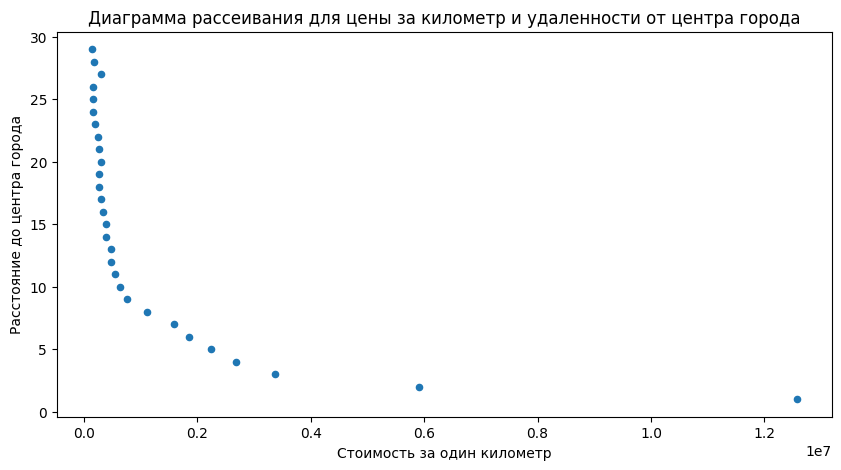

In [216]:
# Создание нового столбца с расчетом цены за 1км
data['price_per_km'] = data['last_price'] / data['cityCenters_nearest_km']

# Создание сводной таблицы по квартирам в Санкт-Петербурге с параметрами общей цены и цены за км.
spb_flats = (
    data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km > 0')
    .pivot_table(index='cityCenters_nearest_km', values = ['last_price', 'price_per_km'])
    )

# Вычисление количества строк в сводной таблице
print(len(spb_flats))


# Создание столбца с удаленностью от центра в км
Centers_nearest_km = []

for i in range(1, 30):
    
    spb_flats.loc[i, 'Centers_nearest_km'] = i

print(spb_flats)


# Выявление зависимости удаленности от стоимости

spb_flats.plot(x='price_per_km', y='Centers_nearest_km', kind='scatter', figsize=(10, 5))
plt.title('Диаграмма рассеивания для цены за километр и удаленности от центра города')
plt.ylabel('Расстояние до центра города')
plt.xlabel('Стоимость за один километр')
plt.show;


#Расчет средней цены каждого километра
print('Средняя стоимость за 1км в Санкт-Петербурге:', spb_flats['price_per_km'].mean().round())

# Расчет коэфициента корреляции
print('Коэфициент корреляции:', spb_flats['price_per_km'].corr(spb_flats['Centers_nearest_km']))


Расстояние до центра напрямую влияет на стоимость квадратного метра, чем дальше от центра, тем дешевлее стоимость. Средняя стоимость километра составляет: 1322085 руб.


## Общий вывод

В рамках проекта было проведено исследование с целью найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

На основании изученных показетелей были сделаны следующие выводы:

**Вывод 1**:
Большинство сделок с недвижимостью приходятся на квартиры с площадью от 30 до 50 кв.м.

**Вывод 2**:
Жилая площадь в большинстве квартир, с которыми были совершены, сделки составляет от 10 до 30 кв.м.

**Вывод 3**:
Площадь кухонь в большинстве квартир, с которыми были совершены сделки, составляет от 5 до 15 кв.м.

**Вывод 4**:
Наибольшее количество сделок было совершено с квартирами стоимостью от 4 до 6 млн.рублей

**Вывод 5**:
Наибольшее количество сделок было совершено с квартирами с 1 и 2 комнатами

**Вывод 6**:
Большинство проданных квартир имеют высоту потолков до 3 метров

**Вывод 7**:
Большинство квартир было продано на 1,2 этажах. Также много сделок было совершено с квартирами на последнеи этаже

**Вывод 8**:
Большинство квартир было продано в 5 и 9-этажных домах

**Вывод 9**:
Удаленность от аэропорта не влияет на количество сделок

**Вывод 10**:
У большинства проданных квартир парки расположеныы на расстоянии 300-900 метров.

**Вывод 11**:
Большинство объявлений было опубликовано во вторник и четверг, меньше всего в воскресенье

**Вывод 12**:
Больше всего публикаций объявлений в феврале, марте, апреле и ноябре, меньше всего в мае, январе и декабре. Также летом идет спад публикаций. 

**Вывод 13**:
В среднем продажа квартиры занимает 2-3 месяца. Однако большинство квартир было продано в течение одного месяца. Быстрые продажи - менее месяца, медленные. Необычно долгие - больше года. 

**Вывод 14**:
Существует тесная взаимосвязт между площадью и ценой квартиры. Коэффициент корреляции 0,82. Чем выше площадь, тем выше цена. Однако от жилой площади и площади стоиомсть квартир зависит в меньшей степени. Коэффициенты корреляции 0,70 и 0.60 соответственно.

**Вывод 15**:
Между типом этажа и ценой нет прямой зависимости. Однако можно сделать вывод, что самые дешевые квартиры на первом этаже, самые дорогие посередине. Последний этаж не является самым дорогим. Но разница в стоимости не сильно заметна.

**Вывод 16**:
Есть большая зависимость между днем публикации и стоимостью объектов. Коэффициент корреляции: 0.81. Во вторник публикуются объекты с самой высокой ценой, в воскресенье с низкой. Получается зависимость, что со вторника медианная стоимость публикуемых объектов снижается. С понедельника начинает расти. b

**Вывод 17**:
Прямой зависимости между месяцем публикации и ценой нет. Коэффициент корреляции 0.03. Можно выделить, что самые дешевые объекты публикуюися в июне, самые дорогие в апреле.

**Вывод 18**:
Самые дорогие объекты продавались в 2014 году, потом пошел резкий спад. В 2019 опять наблюдается тенденция к росту стоимости объектов. Имеется прямая линейная зависимость между годом и стоимостью, коэффициент корреляции 0.66.

**Вывод 19**:
Больше всего оказывает влияние на цену количество комнат, чем больше комнат, тем выше цена. Коэффициент корреляции 0,99

**Вывод 20**:
Наибольшее количество объявлений в Санкт-Петербурге, поселке Мурино, поселке Шушары, Всеволожек, Пушкине, Колпино, поселке Паргово, Гатчине, деревне Кудрово, Выборге. Из них в Санкт-Петербурге самая большая цена за кв. метр 115069 рублей, самая низкая в  Выборге - 57875 рублей. 

**Вывод 21**:
Средняя цена каждого километра в зависимости от удаленности от центра - 1322085 рублей. Цена зависит от удаленности от центра, чем дальше от центра, тем дешевле стоимость.